<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [3]:
X = data_values[:, 0:8]
y = data_values[:,8]

# Holdount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

[Text(0, 0, 'health \n 0.65'), Text(0, 0, 'sick\n0.35')]

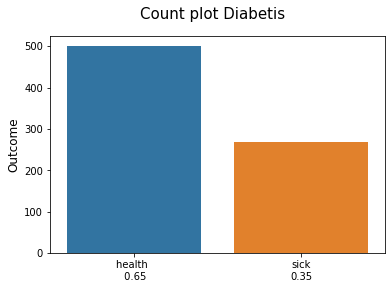

In [5]:
fig, ax = plt.subplots(figsize = (6,4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x=data_values[:,8], ax = ax)
ax.set_ylabel('Outcome', size = 12)
_, data_target = np.unique(data_values[:,8], return_counts = True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])

- Hay un desbalance

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 1)

Epoch 1/300
34/34 [==============================] - 1s 11ms/step - loss: 14.7646 - accuracy: 0.6499 - recall: 0.0053 - val_loss: 8.2626 - val_accuracy: 0.6494 - val_recall: 0.0123
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 3.7370 - accuracy: 0.5680 - recall: 0.1658 - val_loss: 1.8020 - val_accuracy: 0.3723 - val_recall: 0.8395
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 1.3136 - accuracy: 0.4842 - recall: 0.4599 - val_loss: 0.9924 - val_accuracy: 0.4762 - val_recall: 0.5556
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 0.9542 - accuracy: 0.5587 - recall: 0.4492 - val_loss: 0.8424 - val_accuracy: 0.5541 - val_recall: 0.4321
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.5940 - recall: 0.4385 - val_loss: 0.8261 - val_accuracy: 0.5541 - val_recall: 0.5556
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 0.8174 - accuracy: 0.6015 - re

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [8]:
# Problema de optimización
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f'% loss)

17/17 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7952 - recall: 0.6471
Recall: 0.647
Accuracy: 0.795
Loss: 0.444


In [9]:
# Problema de optimización
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % recall)
print('Val Accuracy: %.3f' % accuracy)
print('val Loss: %.3f'% loss)

8/8 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7273 - recall: 0.4938
Val Recall: 0.647
Val Accuracy: 0.795
val Loss: 0.444


In [10]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# Recall and Loss

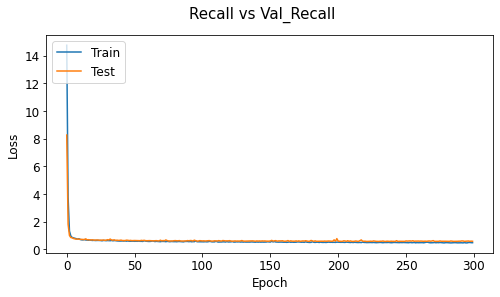

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle('Recall vs Val_Recall', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [12]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[0.0, 180.0, 90.0, 26.0, 90.0, 36.5, 0.314, 35.0] --> 0 (real 1)
[3.0, 106.0, 54.0, 21.0, 158.0, 30.9, 0.292, 24.0] --> 0 (real 0)
[4.0, 91.0, 70.0, 32.0, 88.0, 33.1, 0.446, 22.0] --> 0 (real 0)
[6.0, 166.0, 74.0, 0.0, 0.0, 26.6, 0.304, 66.0] --> 0 (real 0)
[10.0, 101.0, 86.0, 37.0, 0.0, 45.6, 1.136, 38.0] --> 0 (real 1)
[5.0, 147.0, 75.0, 0.0, 0.0, 29.9, 0.434, 28.0] --> 1 (real 0)
[2.0, 114.0, 68.0, 22.0, 0.0, 28.7, 0.092, 25.0] --> 0 (real 0)
[1.0, 97.0, 66.0, 15.0, 140.0, 23.2, 0.48700000000000004, 22.0] --> 0 (real 0)
[0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0] --> 0 (real 1)
[1.0, 107.0, 50.0, 19.0, 0.0, 28.3, 0.18100000000000002, 29.0] --> 0 (real 0)
[2.0, 127.0, 58.0, 24.0, 275.0, 27.7, 1.6, 25.0] --> 0 (real 0)
[3.0, 84.0, 68.0, 30.0, 106.0, 31.9, 0.591, 25.0] --> 0 (real 0)
[3.0, 80.0, 0.0, 0.0, 0.0, 0.0, 0.174, 22.0] --> 0 (real 0)
[2.0, 134.0, 70.0, 0.0, 0.0, 28.9, 0.542, 23.0] --> 0 (real 1)
[12.0, 84.0, 72.0, 31.0, 0.0, 29.7, 0.297, 46.0] --> 0 (real 1)


# Sesgo predictivo

In [14]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos

# Sick
sesgo_prediction = len(y_pred[y_pred==1]) / len(y_test[y_test==1])
sesgo_prediction

0.7654320987654321

- Se presenta un ligero sesgo de predicción

# Confusion Matrix

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[128,  22],
       [ 41,  40]])

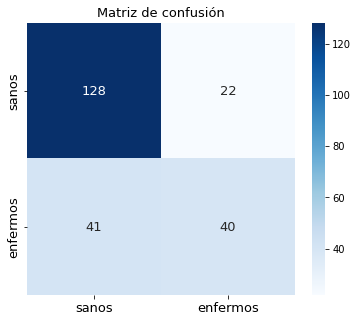

In [16]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

# Metrics

In [27]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Prediction:   {metrics.precision_score(y_test, y_pred, [1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, [1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, [1], average="macro")}' )

Accuracy  :   0.7272727272727273
Kappa     :   0.3669581104006264
predicción enfermos
Prediction:   0.6451612903225806
Recall    :   0.49382716049382713
Specificity:   0.8533333333333334
F1-score   :   0.5594405594405595


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [30]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []

for train, test in kfold.split(X,y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)
  loss_train, _,recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

loss: 0.526 recall: 72.199% val_loss: 0.568 val_recall: 56.754%
loss: 0.504 recall: 56.432% val_loss: 0.562 val_recall: 56.166%
loss: 0.486 recall: 52.697% val_loss: 0.395 val_recall: 39.503%
loss: 0.484 recall: 44.813% val_loss: 0.489 val_recall: 48.913%
loss: 0.507 recall: 43.154% val_loss: 0.466 val_recall: 46.626%
loss: 0.519 recall: 79.668% val_loss: 0.452 val_recall: 45.229%
loss: 0.490 recall: 51.037% val_loss: 0.444 val_recall: 44.382%
loss: 0.479 recall: 68.465% val_loss: 0.520 val_recall: 52.029%
loss: 0.470 recall: 59.091% val_loss: 0.482 val_recall: 48.203%
loss: 0.527 recall: 47.107% val_loss: 0.430 val_recall: 43.047%


In [31]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

==============================Train Recall Total 10 pliegues==============================
0.57% (+/- 0.12%)
==============================Test Recall Total 10 pliegues==============================
0.60% (+/- 0.12%)
==============================Train Loss Total 10 pliegues==============================
0.50% (+/- 0.02%)
==============================Test Loss Total 10 pliegues==============================
0.48% (+/- 0.05%)


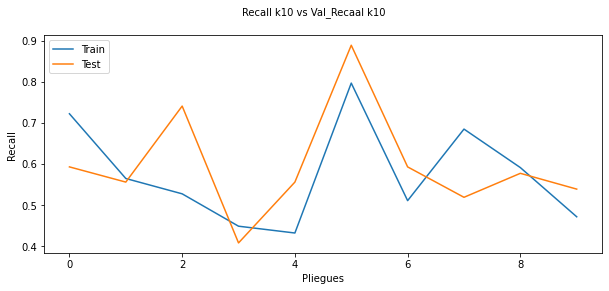

In [32]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

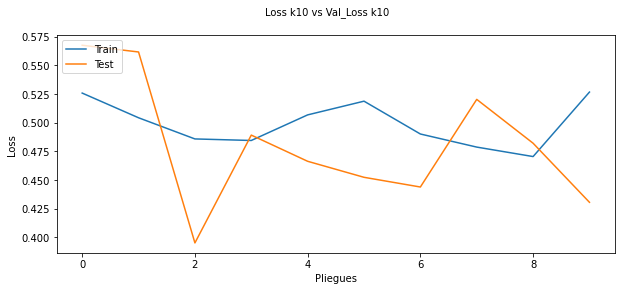

In [33]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)